In [1]:
from pathlib import Path
from s7.entitygen_simple import create_entity
from s7.models import create_config

xls_eff_config = create_config(Path(".").resolve() / 'inhibitor_conf.yml')

DataSourceEffEntity = create_entity(
    data_model=Path(".").resolve() / "efficiency.yaml",
    resource_config={
        "downloadUrl": (Path(".").resolve() / "Inhibitor_Data_Analysis_summary.xlsx").as_uri(),
        "mediaType": "application/vnd.openxmlformats-officedocument.spreadsheetml.sheet",
        "configuration": xls_eff_config,
    },
)
eff_entity = DataSourceEffEntity()


### S7/DLite Data Model - Electrochemical Impedance Spectroscopy (EIS) Efficiency Data

In [2]:
import yaml

print("CAS #:", eff_entity.casNumber)
print("Impedance (24h) [log(Ohm)]:", eff_entity.impedance_log_24h, end="\n\n")

print(yaml.safe_dump(eff_entity.schema()))

CAS #: ['554-13-2', '554-13-2', '7447-41-8', '7447-41-8', '7447-41-8']
Impedance (24h) [log(Ohm)]: [5.00314131824638, 4.99955315940226, 4.11654541915057, 4.24085085066989, 4.40301509970376]

additionalProperties: false
description: Generic Data source entity
properties:
  casNumber:
    description: CAS number
    title: casNumber
    type: string
    unit: null
  impedance_log_24h:
    description: Impedance Log (24h)
    title: impedance_log_24h
    type: number
    unit: log(Ohm)
  runID:
    description: Experiment identification
    title: runID
    type: string
    unit: null
  sampleType:
    description: Molecule name
    title: sampleType
    type: string
    unit: null
title: DataSourceEntity
type: object



In [3]:
xls_lpr_config = create_config(Path(".").resolve() / 'LPR_conf.yml')

DataSourceLPREntity = create_entity(
    data_model=Path(".").resolve() / "lpr.yaml",
    resource_config={
        "downloadUrl": (Path(".").resolve() / "Inhibitor_Data_Analysis_summary.xlsx").as_uri(),
        "mediaType": "application/vnd.openxmlformats-officedocument.spreadsheetml.sheet",
        "configuration": xls_lpr_config,
    },
)
lpr_entity = DataSourceLPREntity()

### S7/DLite Data Model - Linear Polarization Resistance (LPR) Efficiency Data

In [4]:
import yaml

print("CAS #:", lpr_entity.casNumber)
print("LPR 24h [Ohm]:", lpr_entity.lpr_24h, end="\n\n")

print(yaml.safe_dump(lpr_entity.schema()))

CAS #: ['554-13-2', '554-13-2', '554-13-2', '7447-41-8', '7447-41-8', '7447-41-8']
LPR 24h [Ohm]: [42146, 106409, 105467, 8425, 9119, 9649]

additionalProperties: false
description: Generic Data source entity
properties:
  casNumber:
    description: CAS number
    title: casNumber
    type: string
    unit: null
  lpr_24h:
    description: LPR (24h)
    title: lpr_24h
    type: integer
    unit: Ohm
  runID:
    description: Experiment identification
    title: runID
    type: string
    unit: null
  sampleType:
    description: Molecule name
    title: sampleType
    type: string
    unit: null
title: DataSourceEntity
type: object



Knowledge Base


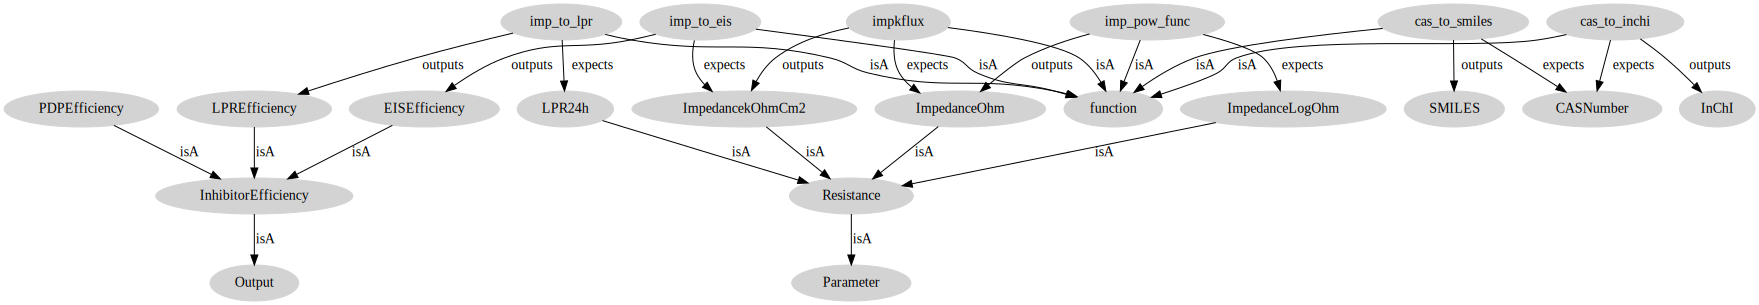

Knowledge Base + mapping


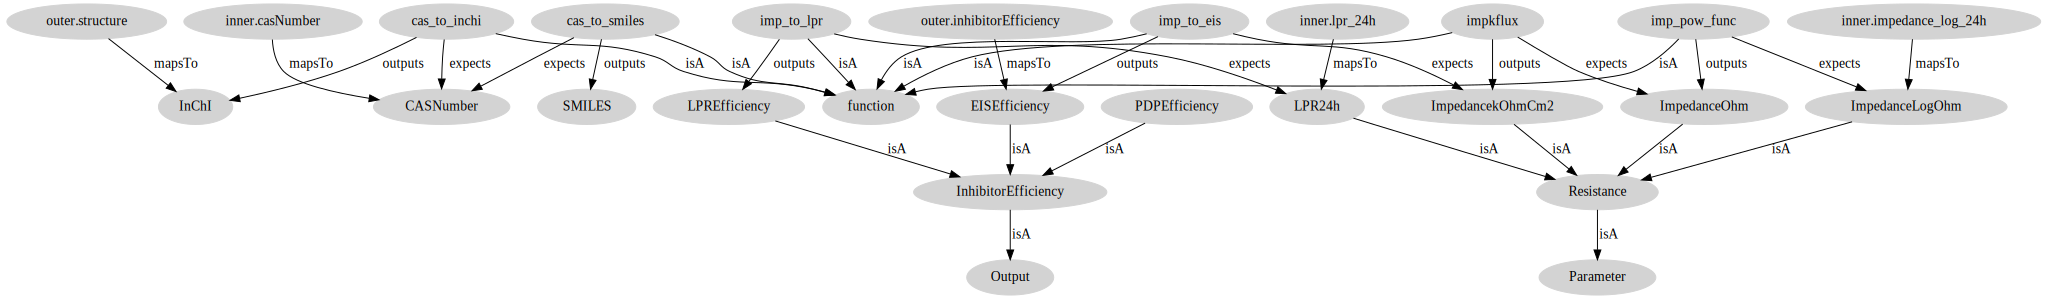

Knowledge Base + mapping + derived (local) functions


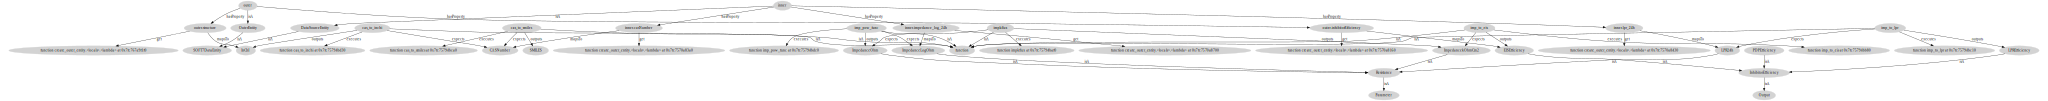

In [10]:
from s7.outer_entitygen_simple import create_outer_entity

GetEfficiency = create_outer_entity(
    data_model=Path(".").resolve() / "ai_model.yaml",
    # inner_entity=lpr_entity,  # lpr_24h
    inner_entity=eff_entity,  # impedance_log_24h
    # inner_entities={
    #     "eff_entity": eff_entity,
    #     "lpr_entity": lpr_entity,
    # }
    mapping=[
        # What we want
        ("outer.structure", "mapsTo", "InChI"),
        # ("outer.structure", "mapsTo", "SMILES"),
        ("outer.inhibitorEfficiency", "mapsTo", "EISEfficiency"),
        # ("outer.inhibitorEfficiency", "mapsTo", "EISEfficiency"),

        # What we got
        # ("eff_entity.casNumber", "mapsTo", "CASNumber"),
        # ("lpr_entity.casNumber", "mapsTo", "CASNumber"),
        # ("lpr_entity.lpr_24h", "mapsTo", "LPR24h"),
        # ("eff_entity.impedance_log_24h", "mapsTo", "ImpedanceLogOhm"),

        # What we got - singly
        ("inner.casNumber", "mapsTo", "CASNumber"),
        ("inner.lpr_24h", "mapsTo", "LPR24h"),
        ("inner.impedance_log_24h", "mapsTo", "ImpedanceLogOhm"),
    ],
)
outer_entity = GetEfficiency()
# print("Log10 calculation of inner entity 'impedance_ohm_24h':", list(log10(entity.impedance_ohm_24h)))
# print("Double calculation of inner entity 'impedance_ohm_24h':", [_ * 2 for _ in entity.impedance_ohm_24h])
# print("Half calculation of inner entity 'impedance_log_24h':", [_ / 2 for _ in entity.impedance_log_24h])




### S7/DLite Data Model

In [11]:
import yaml

print(yaml.safe_dump(outer_entity.schema()))

additionalProperties: false
description: Generic Data source entity
properties:
  inhibitorEfficiency:
    description: EIS 24h
    title: inhibitorEfficiency
    type: number
  structure:
    description: Atomic structure
    title: structure
    type: string
title: OuterEntity
type: object



### Inhibitor Efficiency

In [13]:
print("Outer entity parameter 'inhibitorEfficiency':", outer_entity.inhibitorEfficiency, end="\n\n")
print("Inner entity parameter 'impedance_log_24h':", eff_entity.impedance_log_24h, end="\n\n")
print("Inner entity parameter 'lpr_24h':", lpr_entity.lpr_24h, end="\n\n")

Graph traversed! Path: outer.inhibitorEfficiency -> EISEfficiency -> imp_to_eis -> ImpedancekOhmCm2 -> impkflux -> ImpedanceOhm -> imp_pow_func -> ImpedanceLogOhm -> inner.impedance_log_24h -> inner
Outer entity parameter 'inhibitorEfficiency': [82.8480791047297, 82.70578220798093, -32.10177835991131, 0.7790838781530307, 31.697125120830314]

Inner entity parameter 'impedance_log_24h': [5.00314131824638, 4.99955315940226, 4.11654541915057, 4.24085085066989, 4.40301509970376]

Inner entity parameter 'lpr_24h': [42146, 106409, 105467, 8425, 9119, 9649]



### Structure

In [ ]:
print("Outer entity parameter 'structure':", outer_entity.structure, end="\n\n")
print("Inner entity parameter 'casNumber'", lpr_entity.casNumber, end="\n\n")

Graph traversed! Path: outer.structure -> InChI -> cas_to_inchi -> CASNumber -> inner.casNumber -> inner
Outer entity parameter 'structure': ['InChI=1S/CH2O3.2Li/c2-1(3)4;;/h(H2,2,3,4);;/q;2*+1/p-2', 'InChI=1S/CH2O3.2Li/c2-1(3)4;;/h(H2,2,3,4);;/q;2*+1/p-2', 'InChI=1S/CH2O3.2Li/c2-1(3)4;;/h(H2,2,3,4);;/q;2*+1/p-2', 'InChI=1S/ClH.Li/h1H;/q;+1/p-1', 'InChI=1S/ClH.Li/h1H;/q;+1/p-1', 'InChI=1S/ClH.Li/h1H;/q;+1/p-1']

Inner entity parameter 'casNumber' ['554-13-2', '554-13-2', '554-13-2', '7447-41-8', '7447-41-8', '7447-41-8']



In [ ]:
from s7.graph import Graph

graph_mapping = [
    # ("properties.SMILES", "mapsTo", "SMILES"),
    # ("properties.inhibitorEfficiency", "mapsTo", "EISEfficiency"),
    # ("data.casNumber", "mapsTo", "CAS#"),
    # ("data.inhibitorEfficiency", "mapsTo", "ImpedanceOhm"),
    ("imp_to_flux", "expects", "ImpedanceOhm"),
    ("imp_to_flux", "outputs", "EISEfficiency"),
    ("imp_to_flux", "isA", "function"),
    ("ImpedanceOhm", "isA", "Resistance"),
    ("ImpedanceLogOhm", "isA", "Resistance"),
    ("EISEfficiency", "isA", "InhibitorEfficiency"),
    ("LPREfficiency", "isA", "InhibitorEfficiency"),
    ("Resistance", "isA", "Parameter"),
    ("InhibitorEfficiency", "isA", "Output"),
    # ("function", "hasMethod", "execute"),
    ("cas_to_smiles", "isA", "function"),
    ("cas_to_smiles", "expects", "CAS#"),
    ("cas_to_smiles", "outputs", "SMILES"),

    # Generated in `create_outer_entity()`:
    # ("imp_to_flux", "executes", lambda: ...)
    # ("cas_to_smiles", "executes", lambda: ...)
]
graph = Graph(graph_mapping)
graph.plot()
for _ in graph.recur_find("EISEfficiency", "ImpedanceOhm"):
    print(_)
# graph.path("SMILES", "CAS#")

['EISEfficiency', 'imp_to_flux', 'ImpedanceOhm']


In [ ]:
from s7.graph import Graph
g = Graph()
d = XLSData()

print (d.sampleType)

g.append(('entity', 'hasProperty', 'entity:sampleType'))
g.append(('entity:sampleType', 'propertyOf', 'entity'))

g.append(('entity', 'hasProperty', 'entity:casNumber'))
g.append(('entity:casNumber', 'propertyOf', 'entity'))

g.append(('entity:sampleType', 'mapsTo', 'ontology:sampleType'))
g.append(('entity:sampleType', 'propertyOf', 'entity'))

g.append(('ontology:sampleType', 'mapsfrom', 'entity:sampleType'))
g.append(('entity:casNumber', 'mapsTo', 'ontology:casNumber'))
g.append(('ontology:casNumber', 'mapsFrom', 'entity:casNumber'))
g.append(('entity:inhibitorEfficiency', 'mapsTo', 'ontology:inhibitorEfficiency'))
g.append(('ontology:inhibitorEfficiency', 'mapsTo', 'entity:inhibitorEfficiency'))

g.append(((lambda : d.sampleType), 'executes', 'entity:sampleType'))
g.append(((lambda : d.casNumber), 'executes', 'entity:casNumber'))
g.append(((lambda : d.inhibitorEfficiency), 'executes', 'entity:inhibitorEfficiency'))

# consumer mapping
g.append(('consumer:eff', 'mapsTo', 'ontology:inhibitorEfficiency'))
g.append(('consumer:cas', 'mapsTo', 'ontology:casNumber'))


NameError: name 'XLSData' is not defined